In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from time import gmtime, strftime

%matplotlib inline

In [12]:
from data_augmentation import data_augmentation
from utils import bbox, create_fixed_image_shape, scaleRadius, random_crops
from utils import get_distorted_img
from augmentImages import unsharp_img

In [4]:
from skimage.io import imread, imsave
from skimage import img_as_float, img_as_uint, img_as_ubyte
from skimage.filters.rank import subtract_mean, subtract_mean_percentile
from skimage.morphology import disk

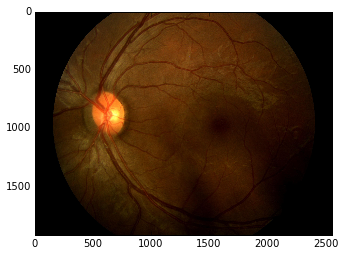

In [20]:
im = imread("/home/ubuntu/dataset/train/1/33096_left.jpeg")  # crop img
# im = imread('/home/ubuntu/dataset/train/4/22901_left.jpeg')  # crop img
# im = imread('/home/ubuntu/dataset/validation/0/12010_right.jpeg')   # full img
# im = imread('/home/ubuntu/dataset/validation/2/19897_left.jpeg')   # crop img
# im = imread('/home/ubuntu/dataset/validation/1/14825_right.jpeg')   # full img
# im = imread('/home/ubuntu/dataset/validation/4/15038_left.jpeg')   # full img
# im = imread('/home/ubuntu/dataset/validation/4/24222_right.jpeg')  # crop img
plt.imshow(im);

In [14]:
scale = 200
crop_shape = (304, 304)
random_draws = 4

In [38]:
def process_img_test(name, label, crop_shape, scale):
    a = cv2.imread(name)
    a = scaleRadius(a,scale)
    if a is None:
        ferr.close()
        return
    
    if "train/" in name:
        new_name = name.replace("train/", "%d_train_aug/" % scale)
    elif "validation/" in name:
        new_name = name.replace("validation/", "%d_val_aug/" % scale)
    print new_name
    plt.figure()
    plt.imshow(a)
    
    ua = unsharp_img(a)
    ca = random_crops(ua, shape=crop_shape)
    plt.figure()
    plt.imshow(ca)
        
    for i in range(random_draws):
        dist_img = get_distorted_img(ua)
        out_name = new_name.replace(".jpeg", "_%d.jpeg" % (i))
        out_im = random_crops(dist_img, shape=crop_shape)
        print out_name
        plt.figure()
        plt.imshow(out_im)

Wed, 16 Dec 2015 14:41:24 [2466] LOG: Input image size (1920, 2560, 3)
Wed, 16 Dec 2015 14:41:24 [2466] LOG: r = 1126.500000 and s = 0.177541, scale = 200
/home/ubuntu/dataset/200_train_aug/1/33096_left.jpeg
/home/ubuntu/dataset/200_train_aug/1/33096_left_0.jpeg
/home/ubuntu/dataset/200_train_aug/1/33096_left_1.jpeg
/home/ubuntu/dataset/200_train_aug/1/33096_left_2.jpeg
/home/ubuntu/dataset/200_train_aug/1/33096_left_3.jpeg


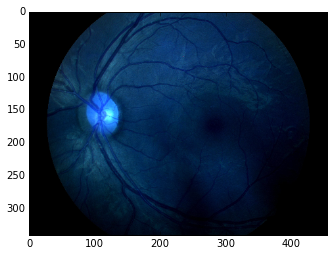

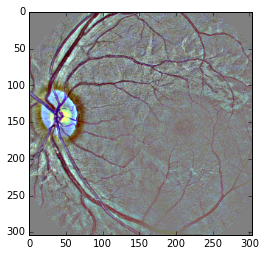

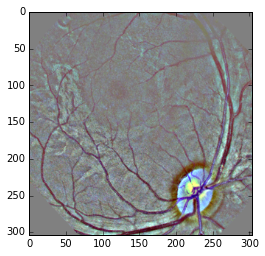

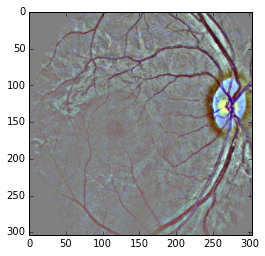

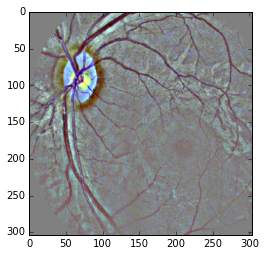

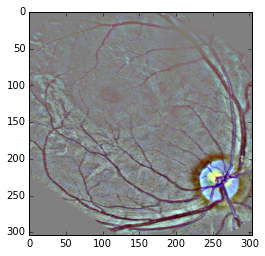

In [39]:
name = "/home/ubuntu/dataset/train/1/33096_left.jpeg"
process_img_test(name, 1, (304, 304), 200)

Mon, 14 Dec 2015 14:42:38 [1551] LOG: Input image size (1920, 2560, 3)
Mon, 14 Dec 2015 14:42:38 [1551] LOG: r = 1126.500000 and s = 0.177541, scale = 200
Mon, 14 Dec 2015 14:42:38 [1551] LOG: bbox: Shape (341, 455, 3)


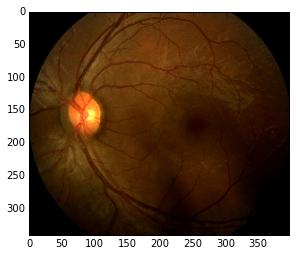

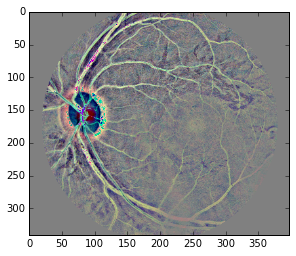

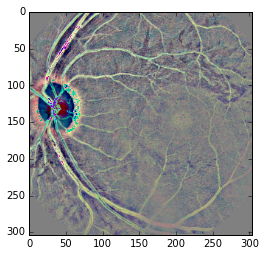

In [22]:
a = bbox(scaleRadius(im,scale))
b = np.zeros(a.shape)
cv2.circle(b,(a.shape[1]//2,a.shape[0]//2),int(scale*0.9),(1,1,1),-1,8,0)
aa = cv2.addWeighted(a,4,cv2.GaussianBlur(a,(0,0),scale/30),-4,128)*b+128*(1-b)
rand_im = random_crops(aa, shape=crop_shape)

plt.imshow(a);
plt.figure()
plt.imshow(aa);
plt.figure()
plt.imshow(rand_im);

(304, 304, 3)


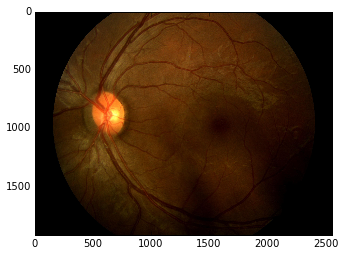

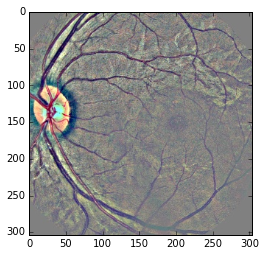

In [20]:
iim = imread('/home/ubuntu/dataset/200_train/1/33096_left.jpeg')
orig = imread('/home/ubuntu/dataset/train/1/33096_left.jpeg')
plt.imshow(orig);
plt.figure();
plt.imshow(iim);
print iim.shape
del iim, orig

In [41]:
scale = 200
crop_shape = (304, 304)
root_folder = '/home/ubuntu/dataset/'
in_folder_train = 'train/'
in_folder_val = 'validation/'
random_draws = 4
pb = [0.01, 0.30, 0.85, 1., 1.]


In [44]:
from joblib import Parallel, delayed

In [52]:
for a, b in names:
    print a, b

/home/ubuntu/dataset/validation/4/30675_right.jpeg 4
/home/ubuntu/dataset/validation/4/30549_left.jpeg 4
/home/ubuntu/dataset/validation/4/19771_left.jpeg 4
/home/ubuntu/dataset/validation/4/986_left.jpeg 4
/home/ubuntu/dataset/validation/4/30255_right.jpeg 4
/home/ubuntu/dataset/validation/4/35112_left.jpeg 4
/home/ubuntu/dataset/validation/4/19663_right.jpeg 4
/home/ubuntu/dataset/validation/4/9863_right.jpeg 4
/home/ubuntu/dataset/validation/4/24222_right.jpeg 4
/home/ubuntu/dataset/validation/4/3501_left.jpeg 4
/home/ubuntu/dataset/validation/4/30722_right.jpeg 4
/home/ubuntu/dataset/validation/4/3064_left.jpeg 4
/home/ubuntu/dataset/validation/4/30570_left.jpeg 4
/home/ubuntu/dataset/validation/4/24773_left.jpeg 4
/home/ubuntu/dataset/validation/4/39134_right.jpeg 4
/home/ubuntu/dataset/validation/4/19604_left.jpeg 4
/home/ubuntu/dataset/validation/4/24472_right.jpeg 4
/home/ubuntu/dataset/validation/4/39164_right.jpeg 4
/home/ubuntu/dataset/validation/4/39353_right.jpeg 4
/home/u

In [54]:
def test(a, b, c):
    print a[0], a[1]

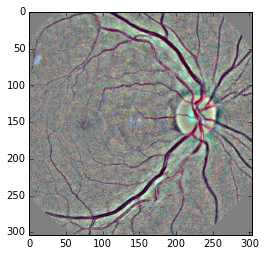

In [58]:
plt.imshow(imread('/home/ubuntu/dataset/200_train_aug/0/10003_right.jpeg'));

In [55]:
names = []
for r, ds, fs in os.walk(root_folder + in_folder_val):
    for f in fs:
        if '.jpeg' not in f:
            continue
        names.append((os.path.join(r, f), int(r.strip('/').split('/')[-1])))
# Create a parallel pool
with Parallel(n_jobs=8) as parallel:
    print len(names)
    rets = parallel(delayed(test)(fname, crop_shape, scale) 
                    for fname in names)

500
/home/ubuntu/dataset/validation/4/30675_right.jpeg 4
/home/ubuntu/dataset/validation/4/30549_left.jpeg 4
/home/ubuntu/dataset/validation/4/19771_left.jpeg 4
/home/ubuntu/dataset/validation/4/30255_right.jpeg 4
/home/ubuntu/dataset/validation/4/986_left.jpeg 4
/home/ubuntu/dataset/validation/4/24222_right.jpeg 4
/home/ubuntu/dataset/validation/4/35112_left.jpeg 4
/home/ubuntu/dataset/validation/4/9863_right.jpeg 4
/home/ubuntu/dataset/validation/4/19663_right.jpeg 4
/home/ubuntu/dataset/validation/4/3501_left.jpeg 4
/home/ubuntu/dataset/validation/1/5407_right.jpeg 1
/home/ubuntu/dataset/validation/4/24773_left.jpeg 4
/home/ubuntu/dataset/validation/4/30722_right.jpeg 4
/home/ubuntu/dataset/validation/2/29996_right.jpeg 2
/home/ubuntu/dataset/validation/0/169_right.jpeg 0
/home/ubuntu/dataset/validation/4/9783_right.jpeg 4
/home/ubuntu/dataset/validation/4/3064_left.jpeg 4
/home/ubuntu/dataset/validation/4/30570_left.jpeg 4
/home/ubuntu/dataset/validation/1/14721_right.jpeg 1
/home/